episode  0 score -47.00 average score -47.00 epsilon 1.00


C:\Users\indyt\OneDrive\Documents\School\UNCC\Fall 2022\Machine Learning\Project\testing Loop\DQN.py:71: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:233.)
  state = T.tensor([observation]).to(self.Q_eval.device)


episode  50 score -38.00 average score -45.59 epsilon 0.57
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
episode  100 score -36.50 average score -26.32 epsilon 0.01
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
episode  150 score 118.00 average score 33.80 epsilon 0.01
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
completed
co

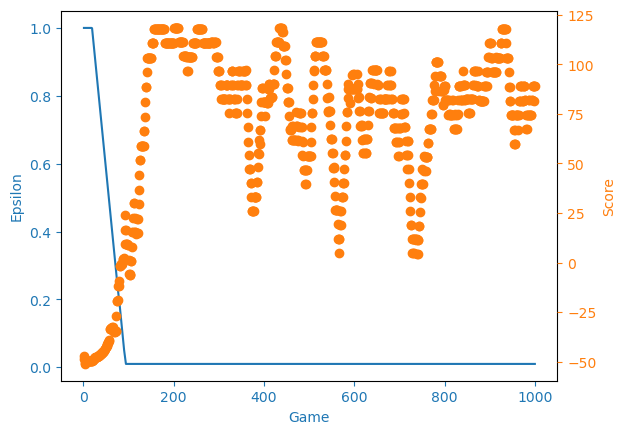

In [1]:
import gym
import numpy as np
from DQN import Agent
from disc_env import DiffDriveEnv
from utils import plotLearning

def convert_observation(dictonary):
    observation = np.zeros(6, dtype=np.float32)
    observation[0:5] = np.concatenate([dictonary['agent'], 
                                       dictonary['target']])
    observation[5] = dictonary['time']
    return observation

if __name__ == '__main__':  
    env = DiffDriveEnv()
#     env.render_mode = "human"
    get = ['agent', 'target', 'time']

    agent = Agent(gamma=0.99, epsilon=1, batch_size=512, n_actions=8, eps_end=0.01,input_dims=[6], lr=0.003)
    scores, eps_history = [], []
    n_games = 1000
    
    for i in range(n_games):
        observation = np.zeros(6, dtype=np.float32)
        score = 0
        done = False
        observation, info = env.reset()     
        observation = convert_observation(observation)
#         for _ in range(50):
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            observation_ = convert_observation(observation_)
            score += reward 
            agent.store_transition(observation, action, reward, 
                                    observation_, done)
            agent.learn()
            observation = observation_
        scores.append(score)
        eps_history.append(agent.epsilon)

        avg_score = np.mean(scores[-100:])
        if i % 50 == 0:
            print('episode ', i, 'score %.2f' % score,
                    'average score %.2f' % avg_score,
                    'epsilon %.2f' % agent.epsilon)
    x = [i+1 for i in range(n_games)]
    filename = 'score.png'
    plotLearning(x, scores, eps_history, filename)

In [20]:
env.render_mode = "human"
observation, info = env.reset() 

In [21]:
done = False
while not done:
    observation = convert_observation(observation)
    action = agent.choose_action(observation)
    observation, reward, done, info = env.step(action)

completed
